In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import imageio
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
num_classes = 2 #output classes 2

In [3]:
# load labels 
from numpy import genfromtxt
y_train = genfromtxt('training.csv', delimiter=',')
y_val =  genfromtxt('test.csv', delimiter=',')
y_test = genfromtxt('validation.csv', delimiter=',')


/home/sarfaraz/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/sarfaraz/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/sarfaraz/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/sarfaraz/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e,

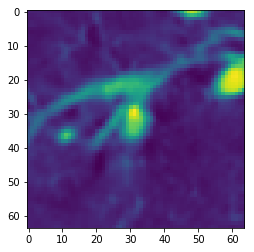

(670, 64, 64, 1)
(670, 64, 64, 1)


In [4]:
im=imageio.mimread('training_data.tif')
x_train = np.array(im) 
plt.imshow(x_train[1], interpolation='nearest')
plt.show()
x_train = x_train.reshape(x_train.shape[0],64,64,1)  


im=imageio.mimread('test_data.tif')
x_test = np.array(im) 
x_test = x_test.reshape(x_test.shape[0],64,64,1)  
print(x_test.shape)


im=imageio.mimread('validation_data.tif')
x_val = np.array(im) 
x_val = x_val.reshape(x_val.shape[0],64,64,1)  
print(x_val.shape)



In [ ]:
'''model = Sequential()


model.add(Conv2D(64, (5, 5), activation='relu',
        input_shape=(64,64,1),use_bias=True ,kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2), strides=None,  data_format=None))

model.add(Conv2D(128, (3, 3),  activation='relu',
      use_bias=True ,kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Conv2D(256, (3, 3),  activation='relu',
        padding='same',use_bias=True ,kernel_regularizer=regularizers.l2(0.01)))


model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())



model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.adam(lr=0.007,decay=0.01),
              metrics=['binary_accuracy'])

model.summary()'''


In [ ]:
''''model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.adam(lr=0.009,decay=0.01),
              metrics=['binary_accuracy'])''''

In [ ]:
'''''checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)
history=model.fit(x_train, y_train,batch_size=1,epochs=50,verbose=1,validation_data=(x_val, y_val),callbacks=[checkpointer])
'''''

In [ ]:
'''score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])'''

In [ ]:
#model.save("model_final2.h5")

In [ ]:
''''model1 = load_model('model_final.h5')''''


In [5]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras import layers
from keras import callbacks
from tensorflow.examples.tutorials.mnist import input_data

from kerassurgeon import identify
from kerassurgeon.operations import delete_channels

from kerassurgeon import Surgeon
from kerassurgeon.operations import delete_channels, delete_layer
from kerassurgeon.identify import get_apoz, high_apoz

In [ ]:
'''''del_layer_index = 7
del_layer = model1.layers[del_layer_index]
apoz = get_apoz(model1, del_layer, x_val)
high_apoz_channels = identify.high_apoz(apoz)
model = delete_channels(model1, del_layer, high_apoz_channels)
'''''

In [ ]:
#model.summary()
#model.save("model_final_pruned.h5")

In [6]:
model=load_model('model_final_pruned.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)         0         
__________

/home/sarfaraz/.local/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [8]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.adam(lr=0.0005,decay=0.1),
              metrics=['binary_accuracy'])

In [9]:
history=model.fit(x_train, y_train,batch_size=1,epochs=20,verbose=1,validation_data=(x_val, y_val))


Train on 5350 samples, validate on 670 samples
Epoch 1/20
5350/5350 [==============================] - 124s 23ms/step - loss: 0.1326 - binary_accuracy: 0.9655 - val_loss: 0.3334 - val_binary_accuracy: 0.9112
Epoch 2/20
5350/5350 [==============================] - 133s 25ms/step - loss: 0.0773 - binary_accuracy: 0.9860 - val_loss: 0.3236 - val_binary_accuracy: 0.9090
Epoch 3/20
5350/5350 [==============================] - 133s 25ms/step - loss: 0.0717 - binary_accuracy: 0.9878 - val_loss: 0.3212 - val_binary_accuracy: 0.9112
Epoch 4/20
5350/5350 [==============================] - 124s 23ms/step - loss: 0.0675 - binary_accuracy: 0.9894 - val_loss: 0.3184 - val_binary_accuracy: 0.9112
Epoch 5/20
4284/5350 [=======================>......] - ETA: 25s - loss: 0.0651 - binary_accuracy: 0.9897

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])